## Business Problem:

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. 
AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. 
The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. 
You are provided with the data of 145k wikipedia pages and daily view count for each of them. 
Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

## Importing required packages:

In [2]:
import pandas as pd
import numpy as np
import math as math
import seaborn as sns
sns.set(style='whitegrid')
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
plt.rcParams['figure.figsize'] = (15, 6)

In [3]:
ad_ease_train = pd.read_csv("train_1.csv")

In [4]:
ad_ease_train

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ad_ease_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [6]:
ad_ease_train.shape

(145063, 551)

In [7]:
ad_ease_train.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [8]:
ad_ease_train.isnull().sum().sort_values(ascending=False)

2015-07-02    20816
2015-07-01    20740
2015-07-07    20664
2015-07-05    20659
2015-07-04    20654
              ...  
2016-12-31     3465
2016-12-20     3268
2016-12-21     3236
2016-12-24     3189
Page              0
Length: 551, dtype: int64

## Exploratory Data Analysis:

### Missing values:

In [9]:
df_null = ad_ease_train[ad_ease_train.isnull().any(axis=1)]

In [10]:
df_null.shape

(27786, 551)

In [11]:
def missing_value(df):
    total_null = df.isnull().sum().sort_values(ascending=False)
    percent_null = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending = False)
    print(f"Total records in our data = {df.shape[0]}) where missing values are as follows:")
    missing_data = pd.concat([total_null,percent_null.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return missing_data
    

In [12]:
missing_value(ad_ease_train)

Total records in our data = 145063) where missing values are as follows:


,Total Missing,In Percent
2015-07-02,20816,14.35
2015-07-01,20740,14.30
2015-07-07,20664,14.24
2015-07-05,20659,14.24
2015-07-04,20654,14.24
...,...,...
2016-12-31,3465,2.39
2016-12-20,3268,2.25
2016-12-21,3236,2.23
2016-12-24,3189,2.20



- We have imputed the missing values with 0 as we have used the aggregation(mean) on the language for total view counts.


### Understanding the page name format and splitting it to get different information:

In [13]:
#page_details = ad_ease_train.Page.str.extract(r'(P.*)\_(P.*).wikipedia.org\_(P.*)\_(P.*)')
ad_ease_train.Page[0:10]


0              2NE1_zh.wikipedia.org_all-access_spider
1               2PM_zh.wikipedia.org_all-access_spider
2                3C_zh.wikipedia.org_all-access_spider
3           4minute_zh.wikipedia.org_all-access_spider
4    52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
5              5566_zh.wikipedia.org_all-access_spider
6            91Days_zh.wikipedia.org_all-access_spider
7             A'N'D_zh.wikipedia.org_all-access_spider
8             AKB48_zh.wikipedia.org_all-access_spider
9             ASCII_zh.wikipedia.org_all-access_spider
Name: Page, dtype: object

In [14]:
page_details=ad_ease_train.Page.str.extract(r'(.*)\_(.*).wikipedia.org\_(.*)\_(.*)')
page_details[0:10]

#(?P.*)\_(?P.*).wikipedia.org\_(?P.*)\_(?P.*)
#page_details = ad_ease_train.Page.str.extract(r'(?P.*)\_(?P.*).wikipedia.org\_(?P.*)\_(?P.*)')

,0,1,2,3
0,2NE1,zh,all-access,spider
1,2PM,zh,all-access,spider
2,3C,zh,all-access,spider
3,4minute,zh,all-access,spider
4,52_Hz_I_Love_You,zh,all-access,spider
5,5566,zh,all-access,spider
6,91Days,zh,all-access,spider
7,A'N'D,zh,all-access,spider
8,AKB48,zh,all-access,spider
9,ASCII,zh,all-access,spider


In [15]:
page_details.columns=['topic','lang','access','type']

In [16]:
page_details[0:10]

,topic,lang,access,type
0,2NE1,zh,all-access,spider
1,2PM,zh,all-access,spider
2,3C,zh,all-access,spider
3,4minute,zh,all-access,spider
4,52_Hz_I_Love_You,zh,all-access,spider
5,5566,zh,all-access,spider
6,91Days,zh,all-access,spider
7,A'N'D,zh,all-access,spider
8,AKB48,zh,all-access,spider
9,ASCII,zh,all-access,spider


In [17]:
page_details["lang"].value_counts().sort_values(ascending  = False)

en    24108
ja    20431
de    18547
fr    17802
zh    17229
ru    15022
es    14069
Name: lang, dtype: int64

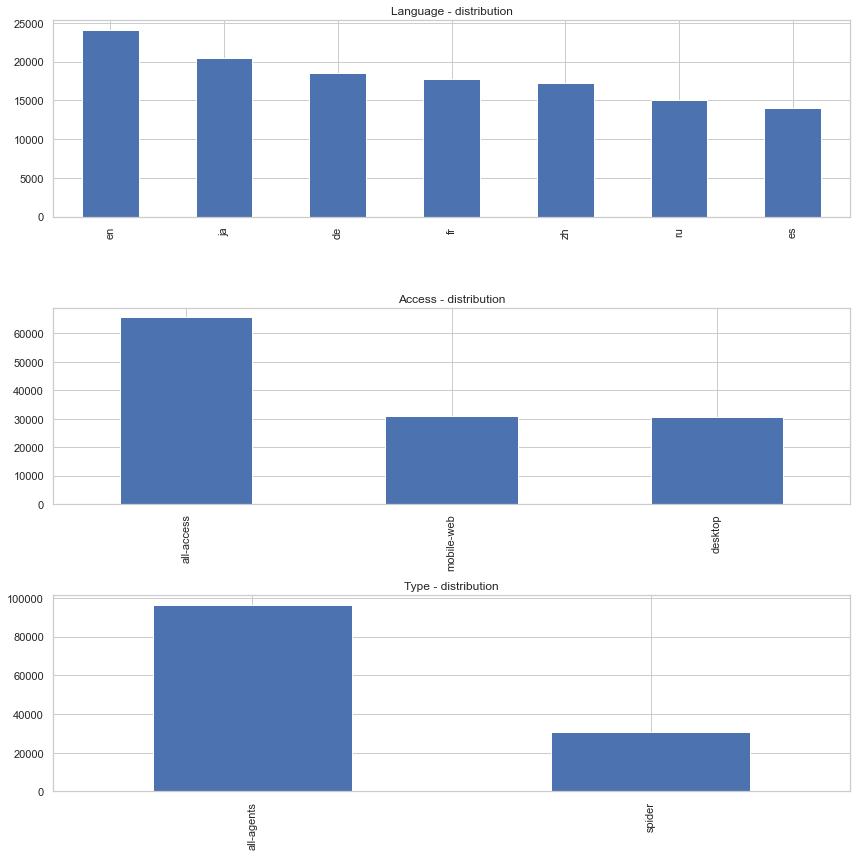

In [18]:
fig, ax  = plt.subplots(3,1,figsize=(12,12))

page_details["lang"].value_counts().sort_values(ascending  = False).plot.bar(ax=ax[0])
ax[0].set_title('Language - distribution')

page_details["access"].value_counts().sort_values(ascending  = False).plot.bar(ax=ax[1])
ax[1].set_title('Access - distribution')

page_details["type"].value_counts().sort_values(ascending  = False).plot.bar(ax=ax[2])
ax[2].set_title('Type - distribution')

plt.tight_layout()

- English webpages are the mostly viewed pages whereas Spanish(es) are the least viewed.
- All access would be prefered as we are getting maximum no. of view counts.
- The distribution type is via all agents (is preferred) as  we are getting most of the views unlike via spider distribution

In [19]:
train_df = pd.concat([page_details, ad_ease_train],axis=1)

### Converting the data to a format that can be fed to the arima model (Pivoting etc)

In [20]:
train_df.head(3)

,topic,lang,access,type,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,zh,all-access,spider,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,zh,all-access,spider,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,zh,all-access,spider,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0


In [21]:
train_df['lang'].nunique()

7

In [22]:
train_df['topic'].nunique()

42212

In [23]:
train_df['access'].nunique()

3

In [24]:
en_df = train_df[train_df['lang']=='en'].iloc[:,:].mean().to_frame().iloc[:,:].reset_index().rename(columns={0:'en'})

In [25]:
en_df

,index,en
0,2015-07-01,4120.242704
1,2015-07-02,4096.969675
2,2015-07-03,3863.318780
3,2015-07-04,4020.385549
4,2015-07-05,4157.757910
...,...,...
545,2016-12-27,6189.329381
546,2016-12-28,6032.638712
547,2016-12-29,6425.295920
548,2016-12-30,5353.679346


In [26]:
lang_list=list(train_df['lang'].unique())

In [27]:
lang_list

['zh', 'fr', 'en', nan, 'ru', 'de', 'ja', 'es']

In [28]:
df = train_df

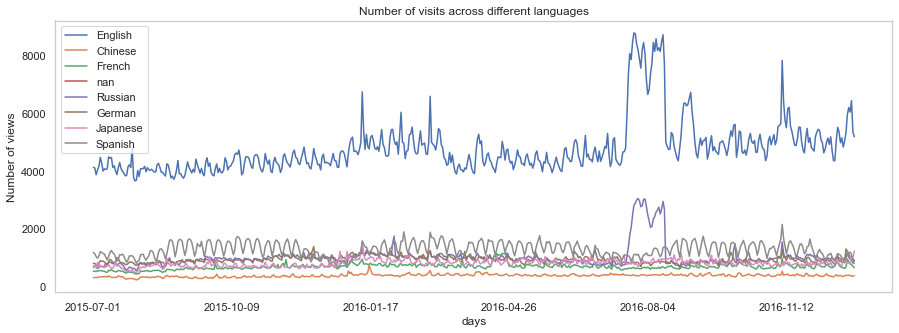

In [29]:
all_languages = df[df['lang'] == 'en'].iloc[:,:].mean().to_frame().iloc[:,:].reset_index().rename(columns={0:'en'})
for i in df['lang'].unique():
    tdf = df[df['lang'] == i].iloc[:,:].mean().to_frame().iloc[:,:].reset_index().rename(columns={0:i})
    all_languages[i] = tdf[i]
all_languages.rename(columns={'en':'English','zh':'Chinese','fr':'French','na':'Media','ru':'Russian','de':'German','ja':'Japanese','es':'Spanish'},inplace=True)
all_languages.set_index("index").plot(kind='line',figsize=(15,5))
plt.grid()
plt.title("Number of visits across different languages")
plt.xlabel("days")
plt.ylabel("Number of views")
plt.show()

- As we can see, during the month of August, 2016 we are seeing a huge spike in the number of views on the web pages. As these are anamolies, we will treat these outliers using simple IQR based method.

In [30]:
all_languages

,index,English,Chinese,French,NaN,Russian,German,Japanese,Spanish
0,2015-07-01,4120.242704,306.174324,526.624206,NaN,694.492845,801.433519,637.635044,1176.993529
1,2015-07-02,4096.969675,306.180041,530.038727,NaN,706.667866,790.469330,732.300645,1125.926357
2,2015-07-03,3863.318780,304.711372,509.429958,NaN,654.068973,758.689914,661.188706,1035.044477
3,2015-07-04,4020.385549,307.106882,544.347518,NaN,615.880100,697.106317,830.489442,972.426566
4,2015-07-05,4157.757910,326.373163,534.101778,NaN,655.269262,809.890360,796.904439,1056.349179
...,...,...,...,...,...,...,...,...,...
545,2016-12-27,6189.329381,380.391169,861.947656,NaN,1008.121724,1095.848843,804.676399,1138.872438
546,2016-12-28,6032.638712,382.556091,777.255710,NaN,938.610821,1042.817652,806.809621,1184.690560
547,2016-12-29,6425.295920,354.776010,755.727032,NaN,903.053531,1004.514348,883.427658,1117.971921
548,2016-12-30,5353.679346,358.554506,703.626382,NaN,808.817615,958.359915,970.883847,825.957059


In [31]:
all_languages =all_languages.rename(columns={'index':'Dates'})

In [32]:
all_languages =all_languages.dropna(axis = 1)

In [33]:
all_languages

,Dates,English,Chinese,French,Russian,German,Japanese,Spanish
0,2015-07-01,4120.242704,306.174324,526.624206,694.492845,801.433519,637.635044,1176.993529
1,2015-07-02,4096.969675,306.180041,530.038727,706.667866,790.469330,732.300645,1125.926357
2,2015-07-03,3863.318780,304.711372,509.429958,654.068973,758.689914,661.188706,1035.044477
3,2015-07-04,4020.385549,307.106882,544.347518,615.880100,697.106317,830.489442,972.426566
4,2015-07-05,4157.757910,326.373163,534.101778,655.269262,809.890360,796.904439,1056.349179
...,...,...,...,...,...,...,...,...
545,2016-12-27,6189.329381,380.391169,861.947656,1008.121724,1095.848843,804.676399,1138.872438
546,2016-12-28,6032.638712,382.556091,777.255710,938.610821,1042.817652,806.809621,1184.690560
547,2016-12-29,6425.295920,354.776010,755.727032,903.053531,1004.514348,883.427658,1117.971921
548,2016-12-30,5353.679346,358.554506,703.626382,808.817615,958.359915,970.883847,825.957059


In [34]:
all_languages.Dates = pd.to_datetime(all_languages.Dates)

In [35]:
eng_df = all_languages[['Dates','English']].set_index('Dates').reset_index()

In [36]:
eng_df

,Dates,English
0,2015-07-01,4120.242704
1,2015-07-02,4096.969675
2,2015-07-03,3863.318780
3,2015-07-04,4020.385549
4,2015-07-05,4157.757910
...,...,...
545,2016-12-27,6189.329381
546,2016-12-28,6032.638712
547,2016-12-29,6425.295920
548,2016-12-30,5353.679346


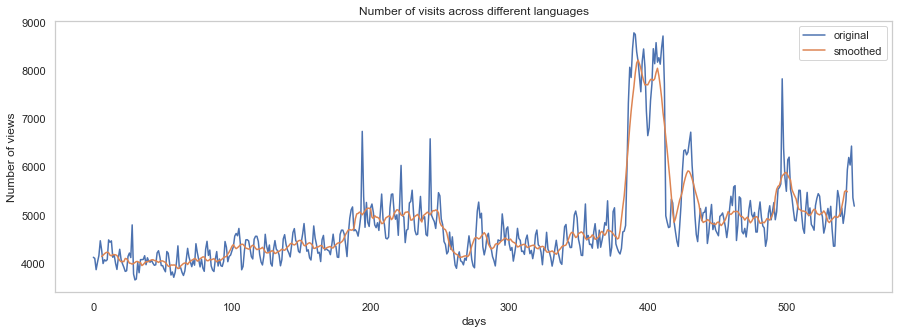

In [37]:
# centered MA: typically used for imputation
eng_df.English.plot(label='original')
eng_df.English.rolling(12, center=True).mean().plot(label='smoothed',figsize=(15,5))
plt.legend()
plt.grid()
plt.title("Number of visits across different languages")
plt.xlabel("days")
plt.ylabel("Number of views")
plt.show()

### Percentiles based outlier removal/detection:

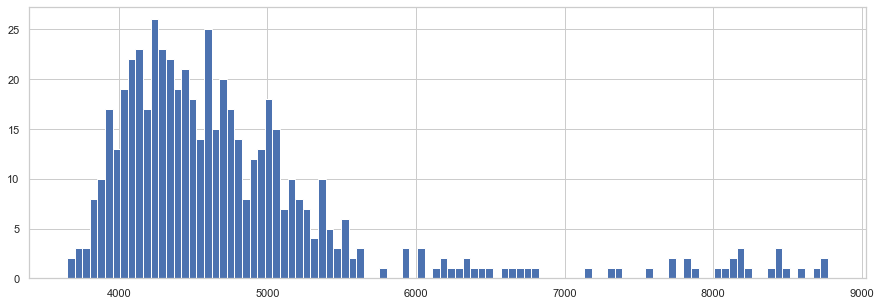

In [38]:
# Remove anamolies using percentiles
plt.figure(figsize=(15,5))
eng_df.English.hist(bins=100).plot()
plt.show()

In [39]:
eng_df.English.describe()

count     550.000000
mean     4773.277263
std       926.906700
min      3650.296939
25%      4216.631281
50%      4558.549069
75%      5000.271195
max      8772.509464
Name: English, dtype: float64

In [40]:
eng_df.English.quantile(0.95)

6723.037270821685

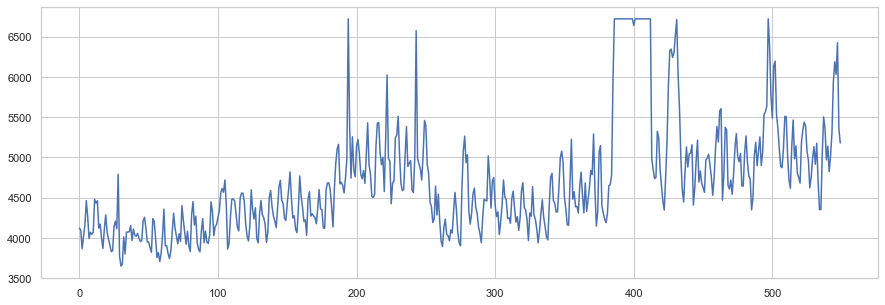

In [41]:
plt.figure(figsize=(15,5))

eng_df.English.clip(upper=eng_df.English.quantile(0.95)).plot()
plt.show()

- After clipping to 95th percentile, we can clearly see the trend (increasing) in the no. of view counts.

In [42]:
eng_df = eng_df.English.clip(upper=eng_df.English.quantile(0.95))

- I have used 95th percentile to clip all the view counts beyond it as they are coming due to the fact (exogenous/any significant event)

In [43]:
all_languages.shape

(550, 8)

In [44]:
list_lang_fin = list(all_languages.columns)
list_lang_fin

['Dates',
 'English',
 'Chinese',
 'French',
 'Russian',
 'German',
 'Japanese',
 'Spanish']

In [45]:
list_lang_fin = list_lang_fin[1:]

In [46]:
list_lang_fin

['English', 'Chinese', 'French', 'Russian', 'German', 'Japanese', 'Spanish']

In [47]:
final_lang_df = eng_df
for i in list_lang_fin[1:]:
    
    new_lang_df = all_languages[i].clip(upper=all_languages[i].quantile(0.95))
    final_lang_df = pd.concat([final_lang_df,new_lang_df], axis = 1)

In [48]:
final_lang_df

,English,Chinese,French,Russian,German,Japanese,Spanish
0,4120.242704,306.174324,526.624206,694.492845,801.433519,637.635044,1176.993529
1,4096.969675,306.180041,530.038727,706.667866,790.469330,732.300645,1125.926357
2,3863.318780,304.711372,509.429958,654.068973,758.689914,661.188706,1035.044477
3,4020.385549,307.106882,544.347518,615.880100,697.106317,830.489442,972.426566
4,4157.757910,326.373163,534.101778,655.269262,809.890360,796.904439,1056.349179
...,...,...,...,...,...,...,...
545,6189.329381,380.391169,825.957589,1008.121724,1095.848843,804.676399,1138.872438
546,6032.638712,382.556091,777.255710,938.610821,1042.817652,806.809621,1184.690560
547,6425.295920,354.776010,755.727032,903.053531,1004.514348,883.427658,1117.971921
548,5353.679346,358.554506,703.626382,808.817615,958.359915,970.883847,825.957059


## Checking stationarity:

### 1.Formatting the data for the model

In [49]:
df = pd.concat([all_languages.iloc[:,:1], final_lang_df] , axis = 1)
df

,Dates,English,Chinese,French,Russian,German,Japanese,Spanish
0,2015-07-01,4120.242704,306.174324,526.624206,694.492845,801.433519,637.635044,1176.993529
1,2015-07-02,4096.969675,306.180041,530.038727,706.667866,790.469330,732.300645,1125.926357
2,2015-07-03,3863.318780,304.711372,509.429958,654.068973,758.689914,661.188706,1035.044477
3,2015-07-04,4020.385549,307.106882,544.347518,615.880100,697.106317,830.489442,972.426566
4,2015-07-05,4157.757910,326.373163,534.101778,655.269262,809.890360,796.904439,1056.349179
...,...,...,...,...,...,...,...,...
545,2016-12-27,6189.329381,380.391169,825.957589,1008.121724,1095.848843,804.676399,1138.872438
546,2016-12-28,6032.638712,382.556091,777.255710,938.610821,1042.817652,806.809621,1184.690560
547,2016-12-29,6425.295920,354.776010,755.727032,903.053531,1004.514348,883.427658,1117.971921
548,2016-12-30,5353.679346,358.554506,703.626382,808.817615,958.359915,970.883847,825.957059


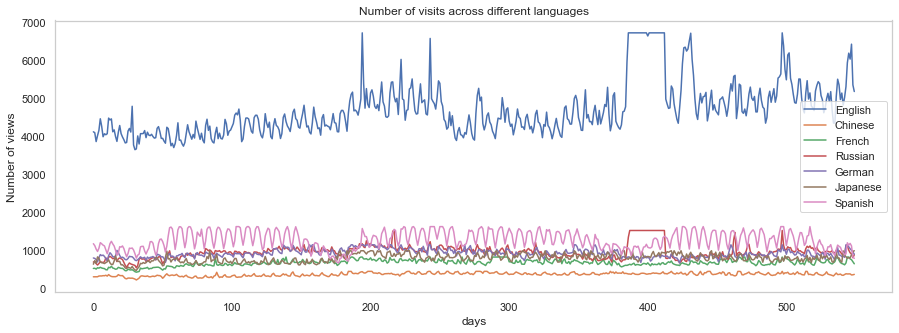

In [50]:
final_lang_df.iloc[:,:].plot(kind='line',figsize=(15,5))
plt.grid()
plt.title("Number of visits across different languages")
plt.xlabel("days")
plt.ylabel("Number of views")
plt.show()


### 2.Dickey fuller test

In [51]:
from statsmodels.tsa.stattools import adfuller# ADF Test

for i in list_lang_fin:
    result = adfuller(all_languages[['Dates',i]].set_index('Dates'), autolag='AIC')
    # Extracting the values from the results:
    print(result)
    print('ADF Statistic: %f' % result[0])

    print('p-value: %f' % result[1])

    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] < result[4]["5%"]:
        print (f"Reject Ho - Time Series is Stationary for {i} language page views")
    else:
        print (f"Failed to Reject Ho - Time Series is Non-Stationary for {i} language page views")
    print('-'*120)
    print('-'*120)
  

(-2.5405988735088383, 0.10590600305281189, 14, 535, {'1%': -3.4426321555520905, '5%': -2.86695748394138, '10%': -2.5696553279762426}, 7697.34031063618)
ADF Statistic: -2.540599
p-value: 0.105906
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Failed to Reject Ho - Time Series is Non-Stationary for English language page views
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
(-2.1682373404138966, 0.21797471929344492, 19, 530, {'1%': -3.4427485933555886, '5%': -2.8670087381529723, '10%': -2.569682641509434}, 5073.138364176107)
ADF Statistic: -2.168237
p-value: 0.217975
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Failed to Reject Ho - Time Series is Non-Stationary for Chinese language page views
------------------------------------------------------------------------------------------

- Time Series is Non-Stationary for English language page views
- Time Series is Non-Stationary for Chinese language page views
- Time Series is Stationary for French language page views
- Time Series is Stationary for Russian language page views
- Time Series is Non-Stationary for German language page views
- Time Series is Stationary for Japanese language page views
- Time Series is Stationary for Spanish language page views

### 3. Decomposing time-series:
- English language pages:

In [52]:
df

,Dates,English,Chinese,French,Russian,German,Japanese,Spanish
0,2015-07-01,4120.242704,306.174324,526.624206,694.492845,801.433519,637.635044,1176.993529
1,2015-07-02,4096.969675,306.180041,530.038727,706.667866,790.469330,732.300645,1125.926357
2,2015-07-03,3863.318780,304.711372,509.429958,654.068973,758.689914,661.188706,1035.044477
3,2015-07-04,4020.385549,307.106882,544.347518,615.880100,697.106317,830.489442,972.426566
4,2015-07-05,4157.757910,326.373163,534.101778,655.269262,809.890360,796.904439,1056.349179
...,...,...,...,...,...,...,...,...
545,2016-12-27,6189.329381,380.391169,825.957589,1008.121724,1095.848843,804.676399,1138.872438
546,2016-12-28,6032.638712,382.556091,777.255710,938.610821,1042.817652,806.809621,1184.690560
547,2016-12-29,6425.295920,354.776010,755.727032,903.053531,1004.514348,883.427658,1117.971921
548,2016-12-30,5353.679346,358.554506,703.626382,808.817615,958.359915,970.883847,825.957059


In [53]:
df.Dates = pd.to_datetime(df.Dates)

In [54]:
#additive decomposition
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(df.English, model='additive', period = 7)

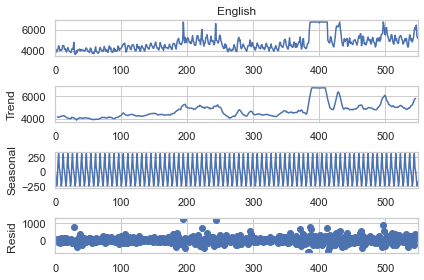

In [55]:
# By default, we get the plot twice with this functionality
# We add ; to avoid seeing the plot

model.plot()
plt.show()

<AxesSubplot:>

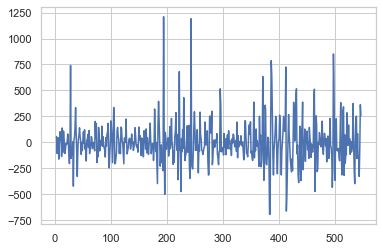

In [56]:
model.resid.plot()

<AxesSubplot:>

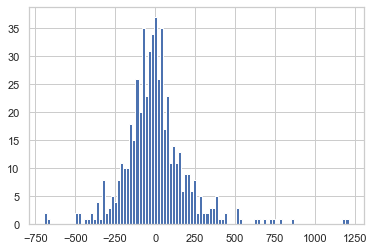

In [57]:
model.resid.hist(bins=100)

In [58]:
model.resid.mean()

-0.08045337562489967

In [59]:
#multiplicative decomposition
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(df.English, model='multiplicative', period = 7)

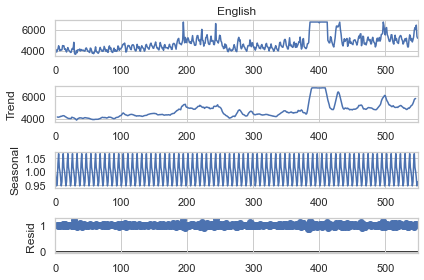

In [60]:
# By default, we get the plot twice with this functionality
# We add ; to avoid seeing the plot

model.plot()
plt.show()

- As we can clearly see from the decomposition that there's a seasonality present.
- There's also an increasing trend

### 4. Differencing the series.

<AxesSubplot:>

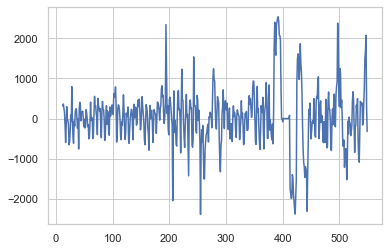

In [61]:
# de-seasonalisation
deseas = df.English.diff(12)
deseas.plot()

## Creating model training and forecasting with ARIMA, SARIMAX

### AutoCorrelation and PartialAutoCorrelation

In [62]:
lag = 1
np.corrcoef(df.English[lag:],df.English.shift(lag)[lag:])[0][1]

0.892969566894908

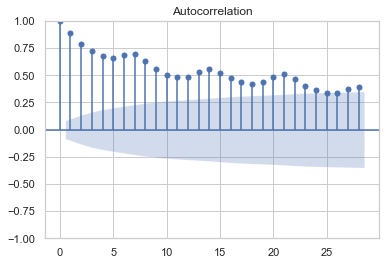

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(df.English);

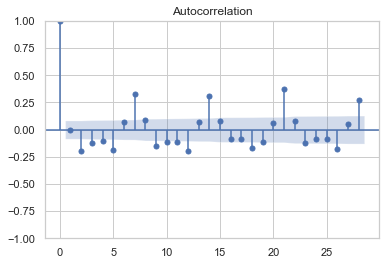

In [64]:
# for detrended time-series
plot_acf(df.English.diff().dropna());

- As, ACF plot is useful for identifying non-stationary time series. For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly.
- Which shows that the seasonality is of 7 days. (weekly)

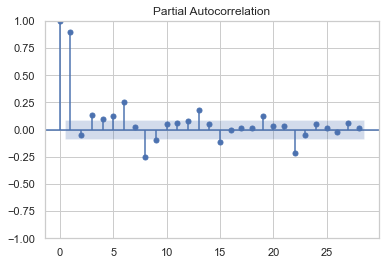

In [65]:
# PACF
plot_pacf(df.English);

In [66]:
df_copy = df

In [67]:
df = df.set_index('Dates')

In [68]:
df

,English,Chinese,French,Russian,German,Japanese,Spanish
Dates,,,,,,,
2015-07-01,4120.242704,306.174324,526.624206,694.492845,801.433519,637.635044,1176.993529
2015-07-02,4096.969675,306.180041,530.038727,706.667866,790.469330,732.300645,1125.926357
2015-07-03,3863.318780,304.711372,509.429958,654.068973,758.689914,661.188706,1035.044477
2015-07-04,4020.385549,307.106882,544.347518,615.880100,697.106317,830.489442,972.426566
2015-07-05,4157.757910,326.373163,534.101778,655.269262,809.890360,796.904439,1056.349179
...,...,...,...,...,...,...,...
2016-12-27,6189.329381,380.391169,825.957589,1008.121724,1095.848843,804.676399,1138.872438
2016-12-28,6032.638712,382.556091,777.255710,938.610821,1042.817652,806.809621,1184.690560
2016-12-29,6425.295920,354.776010,755.727032,903.053531,1004.514348,883.427658,1117.971921


In [69]:
#last 50 days as test

train_x = df.loc[df.index < df.index[-50]].copy()
test_x = df.loc[df.index >= df.index[-50]].copy()
test_x.shape

(50, 7)

In [70]:
test_x1 = test_x.iloc[:,:1]
test_x1.shape

(50, 1)

In [71]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

## Foundational models and trainings:

### Mean model

MAE : 562.011
RMSE : 704.079
MAPE: 0.102


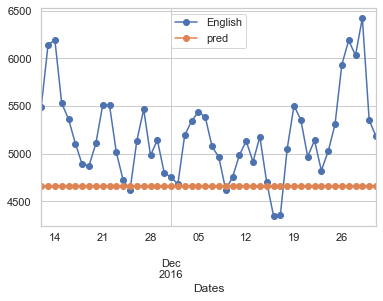

In [72]:
#train mean as test predicted
test_x['pred'] = train_x['English'].mean()

test_x['English'].plot(style='-o')
test_x['pred'].plot(style='-o')

performance(test_x['English'], test_x['pred'])
plt.legend()

### Seasonal Naive:

MAE : 660.914
RMSE : 729.16
MAPE: 0.133


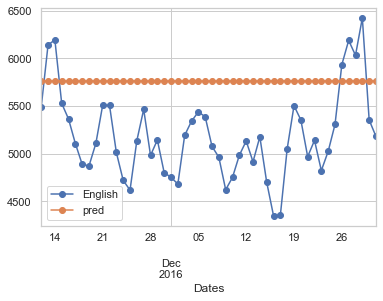

In [73]:
#Simple Naive
## Last value as the value at all future values: high variance model
test_x['pred'] = train_x['English'][-1]

test_x['English'].plot(style='-o')
test_x['pred'].plot(style='-o')

performance(test_x['English'], test_x['pred'])
plt.legend()

In [74]:
test_x.index

DatetimeIndex(['2016-11-12', '2016-11-13', '2016-11-14', '2016-11-15',
               '2016-11-16', '2016-11-17', '2016-11-18', '2016-11-19',
               '2016-11-20', '2016-11-21', '2016-11-22', '2016-11-23',
               '2016-11-24', '2016-11-25', '2016-11-26', '2016-11-27',
               '2016-11-28', '2016-11-29', '2016-11-30', '2016-12-01',
               '2016-12-02', '2016-12-03', '2016-12-04', '2016-12-05',
               '2016-12-06', '2016-12-07', '2016-12-08', '2016-12-09',
               '2016-12-10', '2016-12-11', '2016-12-12', '2016-12-13',
               '2016-12-14', '2016-12-15', '2016-12-16', '2016-12-17',
               '2016-12-18', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Dates', freq=None)

In [75]:
test_x.head(3)

,English,Chinese,French,Russian,German,Japanese,Spanish,pred
Dates,,,,,,,,
2016-11-12,5487.667243,407.264755,825.682597,1017.099623,899.935765,779.382937,1128.540873,5760.478592
2016-11-13,6140.359217,425.872392,767.825473,1095.276586,1021.387068,835.054576,1318.801136,5760.478592
2016-11-14,6196.286645,382.971699,746.839165,1065.850514,1033.071648,812.220358,1540.315464,5760.478592


MAE : 398.319
RMSE : 554.8
MAPE: 0.073


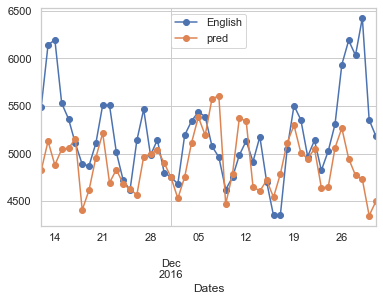

In [76]:
## Seasonal Naive forecast: 63 days based on ACF and PACF plots
for i in test_x.index:
    test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(days = 63)]['English']

test_x['English'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['English'], test_x['pred'])
plt.legend()

### Moving average forecast:

In [77]:
train_x1 = train_x.iloc[:,:1]

MAE : 956.814
RMSE : 1043.618
MAPE: 0.192


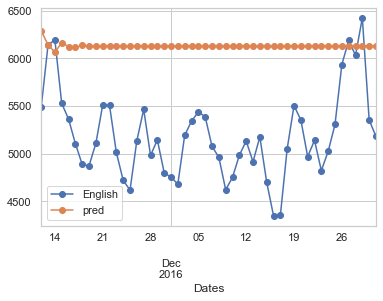

In [78]:
df = train_x1.copy()

df = df.append(pd.DataFrame(index = pd.date_range(start=df.index[-1], periods=50)[1:]))

pred = df.English.dropna().values 

for i in range(50):
    pred = np.append(pred, pred[-3:].mean()) ##MA of window-length=3

test_x['pred'] = pred[-50:]
test_x['English'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['English'], test_x['pred'])
plt.legend()

## ARIMA & SARIMA Models

### ARIMA(p,d,q)

In [79]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        'p': [1, 2, 3],
        'd': [1, 2],
        'q': [1, 2, 3],
        
        }

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 813.327
RMSE : 880.714
MAPE: 0.163


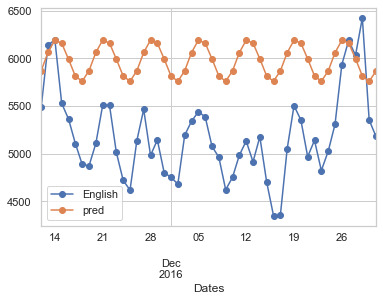

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x.English, order=(3, 1, 3)) 
# RandomizedSearchCV(model, param_distributions=params)
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=50)
test_x['English'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['English'], test_x['pred'])
plt.legend()

### SARIMA (p,d,q,P,D,Q,s)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 603.111
RMSE : 660.853
MAPE: 0.12


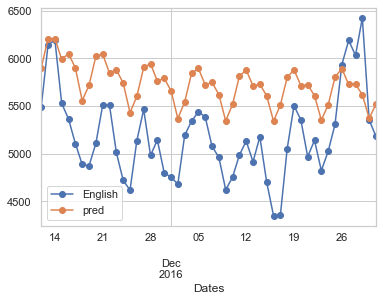

In [82]:
model = SARIMAX(train_x.English, order=(3, 1, 3), seasonal_order=(1,1,1,7))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=50)
test_x['English'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['English'], test_x['pred'])
plt.legend()

### SARIMA with 95% C.I

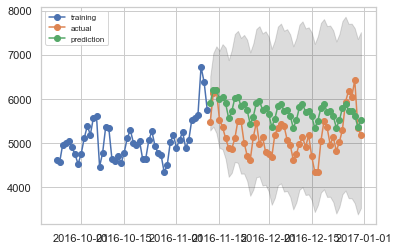

In [83]:
test_x[['lower', 'upper']] = model.get_forecast(steps=50).conf_int(0.05).values
plt.plot(train_x['English'][-50:], '-o', label='training')
plt.plot(test_x['English'], '-o', label='actual')
plt.plot(test_x['pred'], '-o', label='prediction')
plt.fill_between(test_x.index, test_x['lower'], test_x['upper'], 
                 color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
plt.show()


- Confidence interval -> is huge in this case.

## SARIMAX:

## Exog_Campaign_eng:

- This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in english.
- There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in english

In [84]:
exog = pd.read_csv('Exog_Campaign_eng')

In [85]:
exog

,Exog
0,0
1,0
2,0
3,0
4,0
...,...
545,1
546,1
547,1
548,0


In [86]:
final_df = pd.concat([df_copy,exog], axis= 1)
final_df

,Dates,English,Chinese,French,Russian,German,Japanese,Spanish,Exog
0,2015-07-01,4120.242704,306.174324,526.624206,694.492845,801.433519,637.635044,1176.993529,0
1,2015-07-02,4096.969675,306.180041,530.038727,706.667866,790.469330,732.300645,1125.926357,0
2,2015-07-03,3863.318780,304.711372,509.429958,654.068973,758.689914,661.188706,1035.044477,0
3,2015-07-04,4020.385549,307.106882,544.347518,615.880100,697.106317,830.489442,972.426566,0
4,2015-07-05,4157.757910,326.373163,534.101778,655.269262,809.890360,796.904439,1056.349179,0
...,...,...,...,...,...,...,...,...,...
545,2016-12-27,6189.329381,380.391169,825.957589,1008.121724,1095.848843,804.676399,1138.872438,1
546,2016-12-28,6032.638712,382.556091,777.255710,938.610821,1042.817652,806.809621,1184.690560,1
547,2016-12-29,6425.295920,354.776010,755.727032,903.053531,1004.514348,883.427658,1117.971921,1
548,2016-12-30,5353.679346,358.554506,703.626382,808.817615,958.359915,970.883847,825.957059,0


In [87]:
df_ind_dates = final_df.set_index('Dates')
df_ind_dates

,English,Chinese,French,Russian,German,Japanese,Spanish,Exog
Dates,,,,,,,,
2015-07-01,4120.242704,306.174324,526.624206,694.492845,801.433519,637.635044,1176.993529,0
2015-07-02,4096.969675,306.180041,530.038727,706.667866,790.469330,732.300645,1125.926357,0
2015-07-03,3863.318780,304.711372,509.429958,654.068973,758.689914,661.188706,1035.044477,0
2015-07-04,4020.385549,307.106882,544.347518,615.880100,697.106317,830.489442,972.426566,0
2015-07-05,4157.757910,326.373163,534.101778,655.269262,809.890360,796.904439,1056.349179,0
...,...,...,...,...,...,...,...,...
2016-12-27,6189.329381,380.391169,825.957589,1008.121724,1095.848843,804.676399,1138.872438,1
2016-12-28,6032.638712,382.556091,777.255710,938.610821,1042.817652,806.809621,1184.690560,1
2016-12-29,6425.295920,354.776010,755.727032,903.053531,1004.514348,883.427658,1117.971921,1


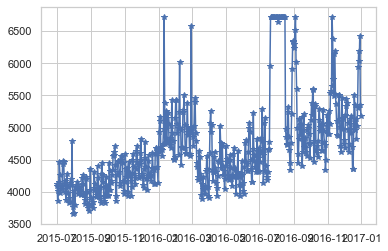

In [88]:
# Lets take a look at our time series plot
plt.plot(df_ind_dates.index, df_ind_dates['English'], '-*')
plt.show()

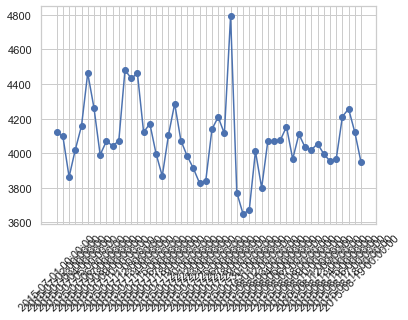

In [89]:
plt.plot(range(50),df_copy['English'][:50], '-o')
plt.xticks(range(0,50), df_copy['Dates'][:50],rotation = 45)
plt.show()

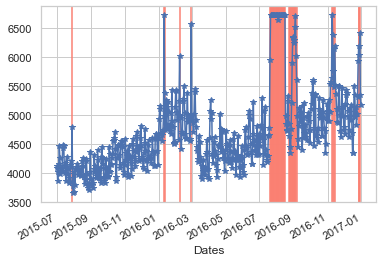

In [90]:
# Lets take a look at our time series plot
exog = df_ind_dates.loc[df_ind_dates.Exog==1].index
for exo in exog:
    plt.axvline(x=exo, color='#FA8072')
df_ind_dates.English.plot(style='-*')
plt.show() 

- As we can clearly see, when we had the campaign or significant event, the user view counts has peaked.
- The SARIMAX model has clearly identified the peaks due to external factors.

<Figure size 432x288 with 0 Axes>

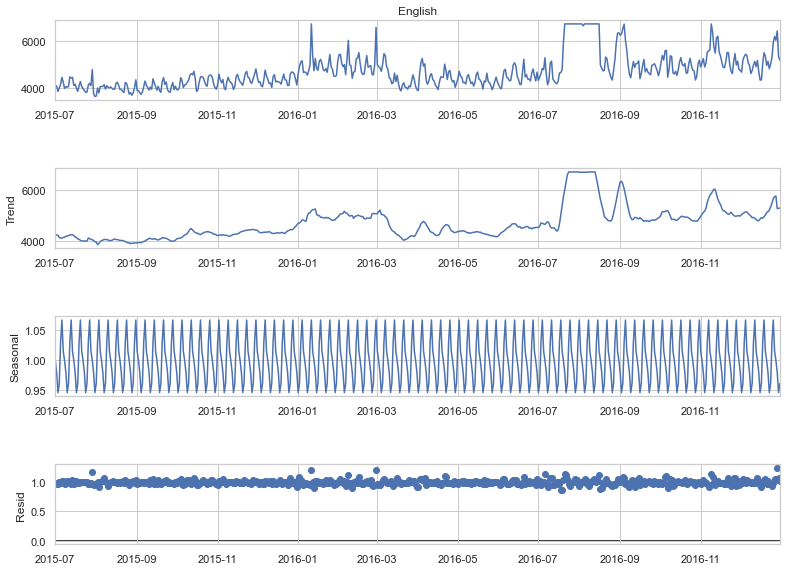

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_ind_dates['English'], model='multiplicative',extrapolate_trend=30)
#,freq = 30
fig = plt.figure()  
fig = result.plot() 
fig.set_size_inches(12, 9)
fig.show()

In [94]:
train = df_ind_dates.iloc[:500]
test = df_ind_dates.iloc[500:]

In [95]:
model = SARIMAX(train['English'],seasonal_order=(1,0,1,7)) # P,D, Q,s
results = model.fit()
fc = results.forecast(42)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


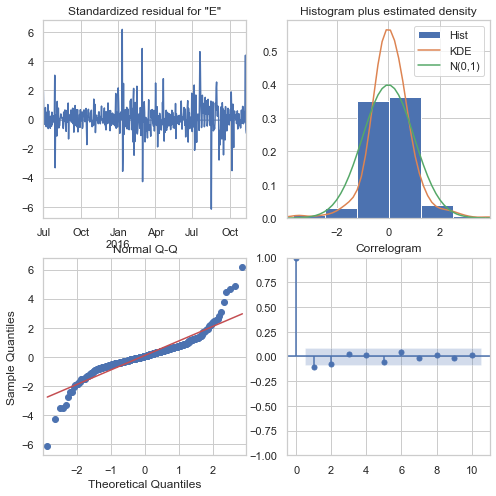

In [96]:
results.plot_diagnostics(figsize=(8,8));

- With the plot_diagnostics, we can clearly see that the purely seasonal model is performing fairly well.
- Which means, there's a seasonality present.
- All residuals are within the error bound.

In [97]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end)

MAE : 370.494
RMSE : 460.175
MAPE: 0.072


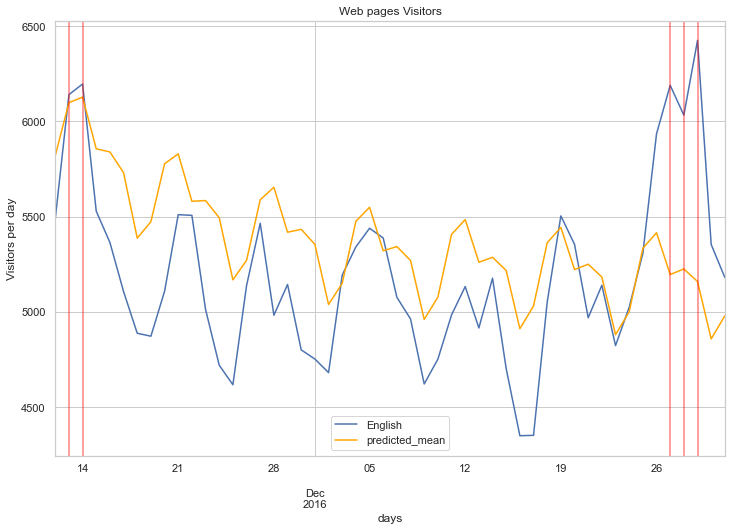

In [98]:
performance(test['English'], predictions)
# Plot predictions against known values
title='Web pages Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['English'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('Exog==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5)

In [99]:
model = SARIMAX(train['English'],exog=train['Exog'],order=(3,1,3),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [100]:
exog_forecast = test[['Exog']]  # requires two brackets to yield a shape of (50,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

MAE : 277.061
RMSE : 341.6
MAPE: 0.055


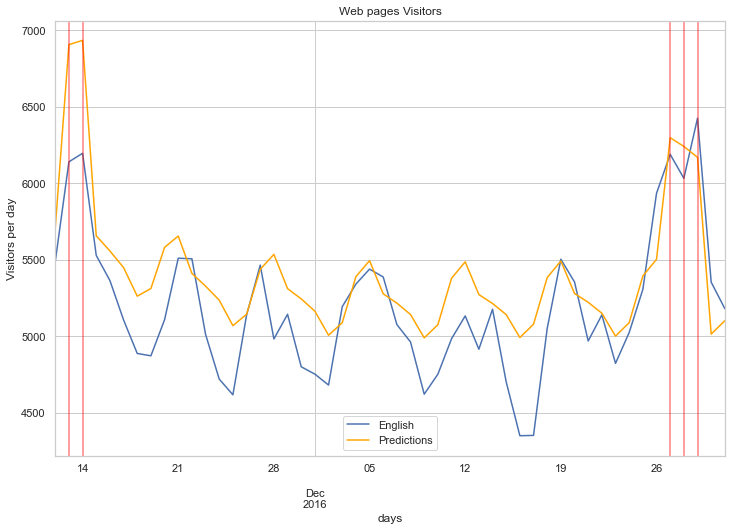

In [101]:
performance(test['English'], predictions)
# Plot predictions against known values
title='Web pages Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['English'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('Exog==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5)

- We can a best MAPE of 5.4 % with seasonality and exogenous factors added.
- With SARIMAX, as there's huge spikes in the view counts during the campaigns and other significant events, our SARIMAX is able to detect the changes and thus the predictions are with very less MAPE(mean absolute percentage error)

### Summary of all models(for English language views):

- Mean model MAPE: 10.2%

- Seasonal Naive 7.3%

- Moving average forecast: 19.2%

- ARIMA(3,1,3): 16.3%

- SARIMA(order=(3, 1, 3), seasonal_order=(1,1,1,7) : 11.4 %

- SARIMAX seasonal_order=(1,0,1,7) -MAPE: 7.2%

- SARIMAX with hyper parameter tuning: order=(3,1,3),seasonal_order=(1,0,1,7) - 5.4%

### Auto ARIMA:

In [102]:
pip install pmdarima

In [103]:
import pmdarima as pm

In [104]:
model = pm.auto_arima(train['English'], exogenous = train['Exog'],seasonal=True, m=12)

In [105]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  500
Model:             SARIMAX(2, 1, 4)x(1, 0, [], 12)   Log Likelihood               -3525.082
Date:                             Fri, 02 Dec 2022   AIC                           7066.165
Time:                                     14:28:26   BIC                           7099.866
Sample:                                 07-01-2015   HQIC                          7079.390
                                      - 11-11-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2425      0.005    263.250      0.000       1.233       1.252
ar.L2         -0.9961      0.004   -240.140      0.000      -1.004      -0.988
ma.L1         -1.4597      0.032    -45.736      0.000      -1.522      -1.397
ma.L2          1.1283      0.075     15.034      0.000       0.981       1.275
ma.L3         -0.0669      0.078     -0.862      0.389      -0.219       0.085
ma.L4         -0.1404      0.049     -2.865      0.004      -0.237      -0.044
ar.S.L12      -0.1687      0.061     -2.749      0.006      -0.289      -0.048
sigma2      9.415e+04   3794.294     24.812      0.000    8.67e+04    1.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1461.58
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               3.69   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MAE : 723.578
RMSE : 790.322
MAPE: 0.145


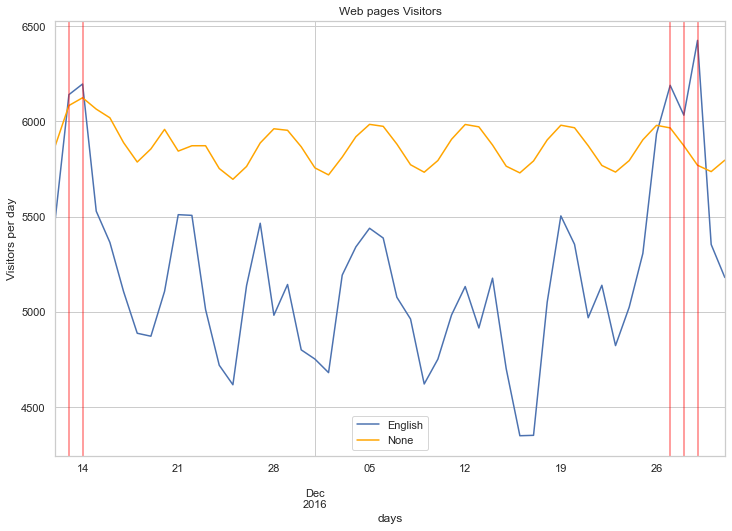

In [106]:
forecasts = model.predict(test.shape[0],exogenous = test['Exog'])
performance(test['English'], forecasts)
# Plot predictions against known values
title='Web pages Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['English'].plot(legend=True,figsize=(12,8),title=title)
forecasts.plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('Exog==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5)

- With Auto ARIMA along with external features, we are getting MAPE as 14.2%
- Which means seasonality is the most important factor even more important than the external factors

## Time Series Forecasting as Linear or Non-linear Regression + innovative features:

### Change points detection:

In [107]:
def plot_changepoints(signal, changepoints):
    for cp in changepoints:
        plt.axvline(x=cp, color='#FA8072')
    plt.plot(signal, '-*', label='signal')

    start = 0
    trends = np.array([])
    for i in changepoints:
        x = np.arange(start, i)
        y = signal[start:i]
        l1 = np.polyfit(x, y, deg=1)
        trend = x*l1[0] + l1[1]
        trends = np.append(trends, trend)
        start = i

    plt.plot(trends, label='trend')
    plt.legend()
    plt.show()

In [108]:
df_copy

,Dates,English,Chinese,French,Russian,German,Japanese,Spanish
0,2015-07-01,4120.242704,306.174324,526.624206,694.492845,801.433519,637.635044,1176.993529
1,2015-07-02,4096.969675,306.180041,530.038727,706.667866,790.469330,732.300645,1125.926357
2,2015-07-03,3863.318780,304.711372,509.429958,654.068973,758.689914,661.188706,1035.044477
3,2015-07-04,4020.385549,307.106882,544.347518,615.880100,697.106317,830.489442,972.426566
4,2015-07-05,4157.757910,326.373163,534.101778,655.269262,809.890360,796.904439,1056.349179
...,...,...,...,...,...,...,...,...
545,2016-12-27,6189.329381,380.391169,825.957589,1008.121724,1095.848843,804.676399,1138.872438
546,2016-12-28,6032.638712,382.556091,777.255710,938.610821,1042.817652,806.809621,1184.690560
547,2016-12-29,6425.295920,354.776010,755.727032,903.053531,1004.514348,883.427658,1117.971921
548,2016-12-30,5353.679346,358.554506,703.626382,808.817615,958.359915,970.883847,825.957059


In [109]:
df_10 = df_copy.set_index('Dates')

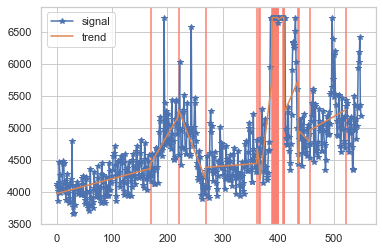

In [110]:
signal = df_10.English # Stationarise for mean as cost function
window=50

def get_slope(y):
    return np.polyfit(np.arange(len(y)), y, deg=1)[0]

changepoints = signal.loc[abs(signal.rolling(window, center=True).apply(get_slope).diff()) > 4].index

# converting to index from dates
temp = signal.reset_index()
changepoints = temp.loc[temp['Dates'].isin(changepoints)].index.tolist()

plot_changepoints(signal.values, changepoints)

- As we can see, there are multiple change points ( around forst 175 days, 225 days, 275 days, 360 days, 400-250 days, 525 days)
- Almost all of them are due to the exogenous features ( campaigns)

In [125]:
exog1

,Exog
0,0
1,0
2,0
3,0
4,0
...,...
545,1
546,1
547,1
548,0


### Forecasting with Regression Model:

In [123]:
df_reg = all_languages[['Dates','English']]
df_reg['dayoftheweek'] = df_reg['Dates'].apply(lambda x : x.strftime('%a'))
df_reg['month'] = df_reg['Dates'].apply(lambda x : x.strftime('%b'))
df_reg['day'] = df_reg['Dates'].apply(lambda x : x.strftime('%d'))
df_reg['exog'] = exog1['Exog']
df_reg['year'] = df_reg['Dates'].apply(lambda x : x.strftime('%Y'))
df_reg ['dayoftheweek_mod'] = df_reg.groupby('dayoftheweek')['English'].transform("mean")
df_reg['month_mod'] = df_reg.groupby('month')['English'].transform('mean')
df_reg['day_mod'] = df_reg.groupby('day')['English'].transform('mean')
df_reg['exog_mod'] = df_reg.groupby('exog')['English'].transform('mean')
df_reg['year_mod'] = df_reg.groupby('year')['English'].transform('mean')

In [124]:
df_reg

,Dates,English,dayoftheweek,month,day,exog,year,dayoftheweek_mod,month_mod,day_mod,exog_mod,year_mod
0,2015-07-01,4120.242704,Wed,Jul,01,0,2015,4770.646066,4996.398068,4731.456878,4534.670657,4187.09889
1,2015-07-02,4096.969675,Thu,Jul,02,0,2015,4657.967817,4996.398068,4838.429354,4534.670657,4187.09889
2,2015-07-03,3863.318780,Fri,Jul,03,0,2015,4508.924225,4996.398068,4824.029074,4534.670657,4187.09889
3,2015-07-04,4020.385549,Sat,Jul,04,0,2015,4582.596278,4996.398068,4842.708189,4534.670657,4187.09889
4,2015-07-05,4157.757910,Sun,Jul,05,0,2015,4922.296453,4996.398068,4841.152482,4534.670657,4187.09889
...,...,...,...,...,...,...,...,...,...,...,...,...
545,2016-12-27,6189.329381,Tue,Dec,27,1,2016,4859.181033,4759.630547,4823.349242,6964.923130,5067.96803
546,2016-12-28,6032.638712,Wed,Dec,28,1,2016,4770.646066,4759.630547,4793.889908,6964.923130,5067.96803
547,2016-12-29,6425.295920,Thu,Dec,29,1,2016,4657.967817,4759.630547,4920.942648,6964.923130,5067.96803
548,2016-12-30,5353.679346,Fri,Dec,30,0,2016,4508.924225,4759.630547,4745.352749,4534.670657,5067.96803


In [126]:
from sklearn.model_selection import train_test_split
X = df_reg[['dayoftheweek_mod','month_mod','day_mod','exog_mod','year_mod']]
Y = df_reg['English']

In [127]:
x_train = X[:500]
x_test = X[500:]
y_train = Y[:500]
y_test = Y[500:]

In [128]:
import statsmodels.api as sm
# x_train = sm.add_constant(x_train)
# x_test = sm.add_constant(x_test

In [129]:
finalmodel = sm.OLS(y_train,x_train).fit()
print(finalmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                English   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              8848.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                        0.00
Time:                        16:11:58   Log-Likelihood:                         -3824.3
No. Observations:                 500   AIC:                                      7659.
Df Residuals:                     495   BIC:                                      7680.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [130]:
print(finalmodel.params)

dayoftheweek_mod    0.460117
month_mod           0.107668
day_mod            -1.049770
exog_mod            0.951857
year_mod            0.525677
dtype: float64


In [131]:
predictions = finalmodel.predict(x_test)

MAE : 452.523
RMSE : 538.464
MAPE: 0.084


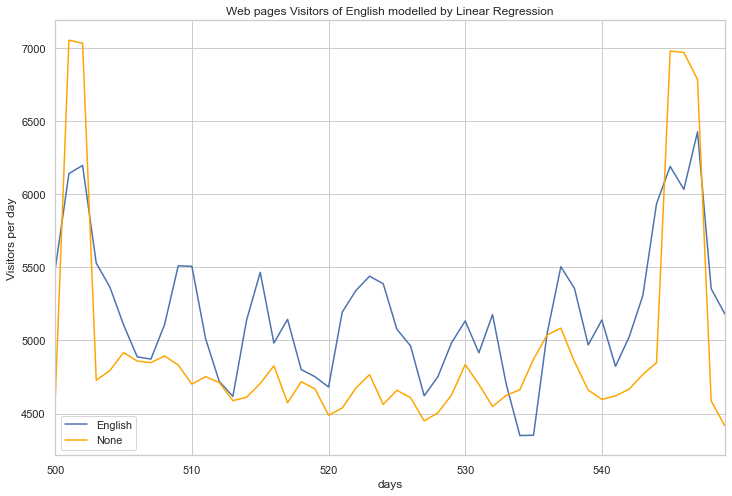

In [132]:
performance(y_test, predictions)
# Plot predictions against known values
title='Web pages Visitors of English modelled by Linear Regression'
ylabel='Visitors per day'
xlabel='days'
ax = y_test.plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

- Linear Regression model is given the MAPE of 8.4 % which is pretty good than the complex models as well

### Forecasting with FB-Prophet ( Alternative to SARIMAX)

In [144]:
!pip install pystan~=2.14


In [134]:
df_copy

,Dates,English,Chinese,French,Russian,German,Japanese,Spanish,exog
0,2015-07-01,4120.242704,306.174324,526.624206,694.492845,801.433519,637.635044,1176.993529,0
1,2015-07-02,4096.969675,306.180041,530.038727,706.667866,790.469330,732.300645,1125.926357,0
2,2015-07-03,3863.318780,304.711372,509.429958,654.068973,758.689914,661.188706,1035.044477,0
3,2015-07-04,4020.385549,307.106882,544.347518,615.880100,697.106317,830.489442,972.426566,0
4,2015-07-05,4157.757910,326.373163,534.101778,655.269262,809.890360,796.904439,1056.349179,0
...,...,...,...,...,...,...,...,...,...
545,2016-12-27,6189.329381,380.391169,825.957589,1008.121724,1095.848843,804.676399,1138.872438,1
546,2016-12-28,6032.638712,382.556091,777.255710,938.610821,1042.817652,806.809621,1184.690560,1
547,2016-12-29,6425.295920,354.776010,755.727032,903.053531,1004.514348,883.427658,1117.971921,1
548,2016-12-30,5353.679346,358.554506,703.626382,808.817615,958.359915,970.883847,825.957059,0


In [135]:
exog1 = pd.read_csv('Exog_Campaign_eng')

In [136]:
df_copy['exog'] = exog1['Exog']

In [137]:
df_fin = df_copy[['Dates', 'English', 'exog']]
df_fin

,Dates,English,exog
0,2015-07-01,4120.242704,0
1,2015-07-02,4096.969675,0
2,2015-07-03,3863.318780,0
3,2015-07-04,4020.385549,0
4,2015-07-05,4157.757910,0
...,...,...,...
545,2016-12-27,6189.329381,1
546,2016-12-28,6032.638712,1
547,2016-12-29,6425.295920,1
548,2016-12-30,5353.679346,0


In [138]:
df_fin['Dates'] = pd.to_datetime(df_fin['Dates'])

In [139]:
df_fin

,Dates,English,exog
0,2015-07-01,4120.242704,0
1,2015-07-02,4096.969675,0
2,2015-07-03,3863.318780,0
3,2015-07-04,4020.385549,0
4,2015-07-05,4157.757910,0
...,...,...,...
545,2016-12-27,6189.329381,1
546,2016-12-28,6032.638712,1
547,2016-12-29,6425.295920,1
548,2016-12-30,5353.679346,0


In [140]:
df_fin['ds'] = df_fin['Dates']
df_fin['y'] = df_fin['English']
df_fin = df_fin[['ds', 'y', 'exog']]
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      550 non-null    datetime64[ns]
 1   y       550 non-null    float64       
 2   exog    550 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 13.0 KB


In [141]:
df_fin_train = df_fin.iloc[:530]
df_fin_test = df_fin.iloc[530:]

In [152]:
#!pip install fbprophet

In [154]:
'''
from prophet import Prophet

model = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, 
               changepoint_prior_scale=4)

#Fit the model

m = model.fit(df_fin_train)
#Make predictions
future = m.make_future_dataframe(periods=20,freq="D")
forecast3 = m.predict(future)
# plt.ylim(2500,8000)
fig = m.plot(forecast3)
'''

'\nfrom prophet import Prophet\n\nmodel = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, \n               changepoint_prior_scale=4)\n\n#Fit the model\n\nm = model.fit(df_fin_train)\n#Make predictions\nfuture = m.make_future_dataframe(periods=20,freq="D")\nforecast3 = m.predict(future)\n# plt.ylim(2500,8000)\nfig = m.plot(forecast3)\n'

In [153]:
df_fin_train.shape

(530, 3)

In [155]:
#forecast3.head()

In [156]:
#performance(df_fin['y'][:-20],forecast3['yhat'][:-20])

In [157]:
'''
plt.plot(forecast3['ds'], forecast3['yhat'],'-*', label = 'Predictions')
plt.plot(df_fin['ds'], df_fin['y'], label = 'Actual')

plt.xlim(pd.to_datetime('2015-07-01'), pd.to_datetime('2016-12-01'))
plt.ylim(2500,8000)
for x in df_fin.query('exog==1')['ds']: 
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.legend()
'''

"\nplt.plot(forecast3['ds'], forecast3['yhat'],'-*', label = 'Predictions')\nplt.plot(df_fin['ds'], df_fin['y'], label = 'Actual')\n\nplt.xlim(pd.to_datetime('2015-07-01'), pd.to_datetime('2016-12-01'))\nplt.ylim(2500,8000)\nfor x in df_fin.query('exog==1')['ds']: \n    plt.axvline(x=x, color='red', alpha = 0.5);\nplt.legend()\n"

- When the exogenous factors are considered along with English language view counts, we are getting MAPE as 4.2%
- FB prophet is able to determine all the change points( shown in red)

In [158]:
df_fin = df_fin[['ds', 'y']]
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      550 non-null    datetime64[ns]
 1   y       550 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


In [159]:
df_fin_train = df_fin.iloc[:500]
df_fin_test = df_fin.iloc[500:]

In [ ]:
#m = Prophet()
#m.fit(df_fin_train)

In [ ]:
#future = m.make_future_dataframe(periods=50, freq = 'D')
#future.tail()

In [160]:
#forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [161]:
df_fin_test.shape

(50, 2)

In [162]:
'''
performance(df_fin_test['y'],forecast['yhat'][500:])

# Plot predictions against known values
title='Web pages Visitors of English language modelled by Prophet'
ylabel='Visitors per day'
xlabel='days'
ax = df_fin_test['y'].plot(legend=True,figsize=(12,8),title=title)
forecast['yhat'][500:].plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()
'''

"\nperformance(df_fin_test['y'],forecast['yhat'][500:])\n\n# Plot predictions against known values\ntitle='Web pages Visitors of English language modelled by Prophet'\nylabel='Visitors per day'\nxlabel='days'\nax = df_fin_test['y'].plot(legend=True,figsize=(12,8),title=title)\nforecast['yhat'][500:].plot(legend=True,color = 'orange')\nax.autoscale(axis='x',tight=True)\nax.set(xlabel=xlabel, ylabel=ylabel)\nplt.show()\n"

In [163]:
#fig1 = m.plot(forecast)

- The confidence interval of the predictions is also in the range (+- 1000) views which is very great

In [164]:
#fig2 = m.plot_components(forecast)

- On monday, we have maximum number of view counts followed by a decreasing trend till friday. On weekends the view counts shoots up!!

In [ ]:
#from prophet.plot import plot_plotly, plot_components_plotly

#plot_plotly(m, forecast)

In [165]:
#plot_components_plotly(m, forecast)

- When the exogenous factors are NOT considered along with English language view counts, we are getting MAPE as 5.6%

## Creating a pipeline for working with multiple series

### Forecasting for different languages

In [166]:
df_ind_dates_train = df_ind_dates[:500]
df_ind_dates_test = df_ind_dates[500:]

In [167]:
for i in df_ind_dates.columns:
  print("Performance Metrics after Auto Arima for ",i)
  model = pm.auto_arima(df_ind_dates_train[i], exogenous = df_ind_dates_train['Exog'],seasonal=True, m=12)
  forecasts = model.predict(df_ind_dates_test.shape[0],exogenous = df_ind_dates_test['Exog'])
  performance(df_ind_dates_test[i], forecasts)
  print('-'*50)

Performance Metrics after Auto Arima for  English
MAE : 723.578
RMSE : 790.322
MAPE: 0.145
--------------------------------------------------
Performance Metrics after Auto Arima for  Chinese
MAE : 29.194
RMSE : 33.117
MAPE: 0.079
--------------------------------------------------
Performance Metrics after Auto Arima for  French
MAE : 55.491
RMSE : 63.159
MAPE: 0.08
--------------------------------------------------
Performance Metrics after Auto Arima for  Russian
MAE : 129.625
RMSE : 146.541
MAPE: 0.136
--------------------------------------------------
Performance Metrics after Auto Arima for  German
MAE : 64.604
RMSE : 80.172
MAPE: 0.071
--------------------------------------------------
Performance Metrics after Auto Arima for  Japanese
MAE : 51.87
RMSE : 69.18
MAPE: 0.063
--------------------------------------------------
Performance Metrics after Auto Arima for  Spanish
MAE : 292.161
RMSE : 330.547
MAPE: 0.277
--------------------------------------------------
Performance Metric

- With Auto ARIMA below are the languages with decreasing order of MAPE:
Japanese(6.3%) < German(6.9%) < Chinese(7.9%) < French(8%) < Russian(13.6%) < English(14.7) < Spanish(29.6%)

## Questionnaire:

1) Defining the problem statements and where can this and modifications of this be used?

- To forecast the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.
- The modification of this can be used in case of Scaler's advertising. If Scaler Academy is willing to open it's branches in different regions, then the best time(ex. monday) and maximum digital adv capital (on english web pages, can be understood)

2) Write 3 inferences you made from the data visualizations

- English webpages are the mostly viewed pages whereas Spanish(es) are the least viewed.
- The distribution type is via all agents and is preferred as with it, we are getting most of the views unlike via spider distribution
- As we can see, during the month of August, 2016 we are seeing a huge spike in the number of views on the web pages. As these are anamolies, we will treat these outliers using simple IQR based method.

3) What does the decomposition of series do?

- The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns.( ex: Trends, Seasonality, Residuals distribution)

4) What level of differencing gave you a stationary series?

- I got 3 time series ( English, Japanese and German languages) as stationary with 1 level of differentiation.

5) Difference between arima, sarima & sarimax.
- ARIMA -> Differencing (detrending) and residual smoothing ( moving average) are considered with order of differentiation ( p,d,q)

- SARIMA -> Along with above parameters as in ARIMA, seasonality(s) and the seasonality effect on Differencing (detrending) , residual smoothing ( moving average) and order of derivative is considered (p,q,d,P,Q,D,s)

- SARIMAX -> Along with SARIMA's parameters, changes due to external/exogenous factors are also considered (p,q,d,P,Q,D,s,exog)

6) Compare the number of views in different languages
- English webpages are the mostly viewed pages whereas Spanish(es) are the least viewed.
- With Auto ARIMA below are the languages with decreasing order of MAPE:
Japanese(6.3%) < German(6.9%) < Chinese(7.9%) < French(8%) < Russian(13.6%) < English(14.7) < Spanish(29.6%)

- Meaning, if the advertising agency is forecasting then they will have least amount of loss in ad placements on Japanese, German web pages and most amount of losses on Spanish web pages. Keeping this in mind, Adease should allocate their digital/monetary resources on proper language's web pages.

7) What other methods other than grid search would be suitable to get the model for all languages?

- Auto ARIMA, confidence interval detection, FB Prophet are the other methods other than hyper parameter tuning ( grid search) that would be suitable to get the model for all languages